# K-means classifier
## Introduction
This notebook implements a K-means classifier based on Andrew Ng's Coursera machine learning course practical exercice of week 8. Let's first import the module necessary for this analysis. We will define and validate the algorithm functions on the dataset included in Coursera's exercice and then we will work on the *wine* dataset which is built in sklearn.

In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.io

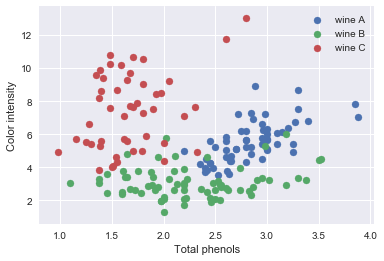

## The K-means algorithm
### Important functions
The K-means algorithm clusters data together. First, centroids are initiated are random point locations. Then, over several iterations, data are assigned to the closest centroid and the location of the centroid is updated to correspond to the mean of data points. Let's define the functions which perform these two actions.

In [48]:
def closest_centroid(X, centroids):
    """Calculate membership for each centroid and data example and return a vector containing the number of the closest
    centroid for each data example.
    X :         matrix of data points
    centroids : coordinates of centroids"""
    #vector of centroid indices
    idx = np.zeros((X.shape[0], 1))
    
    for i in range(X.shape[0]):
        #distances between one data example and centroids
        d = np.zeros((centroids.shape[0], 1))
        for j in range(centroids.shape[0]):
            diff = X[i, :].T - centroids[j, :].T
            d[j] = np.dot(diff.T, diff)
        idx[i] = np.argmin(d)
        
    return idx

In [216]:
#test of closest_centroid
test = scipy.io.loadmat("ex7data2.mat")
#X = np.array([[1.8, 4.6], [5.7, 4.8], [6.4, 3.3]])
X = test['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = closest_centroid(X, initial_centroids)
print(idx[:3,:]) #should return 0, 2, 1

[[0.]
 [2.]
 [1.]]


In [49]:
def compute_centroids(X, idx, K):
    """Return new centroids by calculating the mean of the data points assigned to each one of the centroids.
    X :   matrix of data points
    idx : indices of centroids assigned to each data point of X
    K :   number of centroids"""
    centroids = np.zeros((K, X.shape[1]))
    
    for i in range(K):
        centroids[i, :] = np.mean(X[(idx == i).flatten(), :], axis=0)
        
    return centroids

In [47]:
#test of compute_centroids
K = 3
centroids = compute_centroids(X, idx, K)
print(centroids) #should return [[2.42830111 3.15792418], [5.81350331 2.63365645], [7.11938687 3.6166844 ]]

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [52]:
def init_centroids(X, K):
    """Initialize centroids by assigning them to a point of the data matrix X in a random manner.
    X : matrix of data points
    K : number of centroids"""
    rand_idx = np.random.permutation(X.shape[0])[:K]
    centroids = X[rand_idx, :]
    
    return centroids

### Putting the functions together
Now that we defined the important functions that run during K-means classification, let's put them together in a function which will run the classification.

In [92]:
def kmeans(X, n_iter, K):
    """Perform K-means classification on dataset X and return the coordinates of centroids and the indices of centroids
    assigned to each data point of X"""
    #initialize data and parameters
    m, n = X.shape
    centroids = init_centroids(X, K)
    idx = np.zeros((m, 1))
    
    #record history of centroids to plot progress
    history = np.zeros((n_iter + 1, K, X.shape[1]))
    history[0] = centroids
    
    #run K-means
    for i in range(n_iter):
        #centroids assignment
        idx = closest_centroid(X, centroids)
        
        #update centroids
        centroids = compute_centroids(X, idx, K)
        
        history[i + 1] = centroids
        
    return history, centroids, idx

In [217]:
history, centroids, idx = kmeans(X, 10, 3)

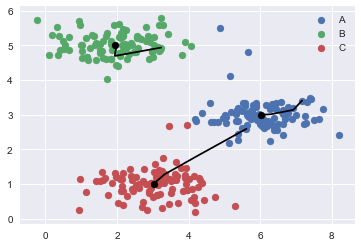

In [218]:
fig, ax = plt.subplots()

#plot clustered data
ax.scatter(X[(idx==0).flatten(), 0], X[(idx==0).flatten(), 1], color='C0', label='A')
ax.scatter(X[(idx==1).flatten(), 0], X[(idx==1).flatten(), 1], color='C1', label='B')
ax.scatter(X[(idx==2).flatten(), 0], X[(idx==2).flatten(), 1], color='C2', label='C')

#plot centroids
plt.scatter(centroids[0, 0], centroids[0, 1], color='black')
plt.scatter(centroids[1, 0], centroids[1, 1], color='black')
plt.scatter(centroids[2, 0], centroids[2, 1], color='black')

#plot centroid history
ax.plot(history[:, 0, 0], history[:, 0, 1], color='black')
ax.plot(history[:, 1, 0], history[:, 1, 1], color='black')
ax.plot(history[:, 2, 0], history[:, 2, 1], color='black')

ax.legend()
plt.show()

The data are pretty well classified. Let's see if the algorithm performs well on data from the *wine* dataset from sklearn.

## K-means classification on wines
K-means performs unsupervised learning, so we will ignore the *target* values of the dataset during training of the model. We will use these values to check if classification is accurate.

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


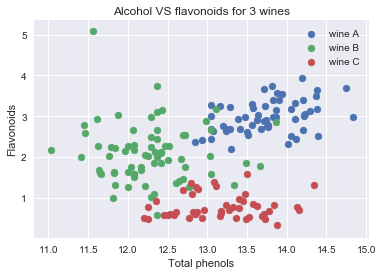

In [212]:
#load dataset
wine = datasets.load_wine()

print(wine['feature_names'])

#create input X and output Y variables
X = wine['data'][:, [0, 6]]
Y = wine['target'][:, np.newaxis]

#create filters for wine type
is_A = (Y == 0).flatten()
is_B = (Y == 1).flatten()
is_C = (Y == 2).flatten()

#plot data
fig, ax = plt.subplots()
ax.scatter(X[:, 0][is_A], X[:, 1][is_A], color='C0', label='wine A')
ax.scatter(X[:, 0][is_B], X[:, 1][is_B], color='C1', label='wine B')
ax.scatter(X[:, 0][is_C], X[:, 1][is_C], color='C2', label='wine C')
ax.set_xlabel('Total phenols')
ax.set_ylabel('Flavonoids')
ax.set_title("Alcohol VS flavonoids for 3 wines")
ax.legend()
plt.show()

In [213]:
#train the model and classify data
history, centroids, idx = kmeans(X, 10, 3)

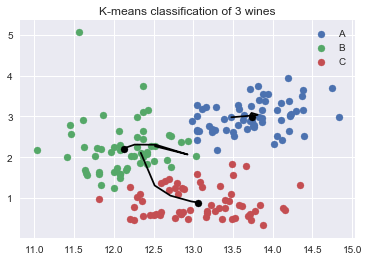

In [214]:
fig, ax = plt.subplots()

#plot clustered data
ax.scatter(X[(idx==0).flatten(), 0], X[(idx==0).flatten(), 1], color='C0', label='A')
ax.scatter(X[(idx==1).flatten(), 0], X[(idx==1).flatten(), 1], color='C1', label='B')
ax.scatter(X[(idx==2).flatten(), 0], X[(idx==2).flatten(), 1], color='C2', label='C')

#plot centroids
plt.scatter(centroids[0, 0], centroids[0, 1], color='black')
plt.scatter(centroids[1, 0], centroids[1, 1], color='black')
plt.scatter(centroids[2, 0], centroids[2, 1], color='black')

#plot centroid history
ax.plot(history[:, 0, 0], history[:, 0, 1], color='black')
ax.plot(history[:, 1, 0], history[:, 1, 1], color='black')
ax.plot(history[:, 2, 0], history[:, 2, 1], color='black')

ax.set_title("K-means classification of 3 wines")
ax.legend()
plt.show()

We can check the accuracy of K-means for this dataset, although you need to make sure you visually re-map the values of the centroids assignment, since the centroid are initialized at random.

In [215]:
#re-map indices of classifier
np.place(idx, idx==0, 0)
np.place(idx, idx==1, 1)
np.place(idx, idx==2, 2)

#calculate accuracy
accuracy = np.mean(Y == idx)
print("Accuracy of K-means classifier: {:.3f}".format(accuracy))

Accuracy of K-means classifier: 0.893
